In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def plot_histograms(datasets, ranges_dict=None, labels=None, figsize=(15, 10)):
    # 默认取值范围
    if ranges_dict is None:
        ranges_dict = {
            'NpE1': (0, 500), 'NpE2': (0, 500), 'NhitE': (0, 1000), 'NtrigE': (0, 500),
            'NfiltE': (0, 500), 'NhitM': (0, 500), 'Eage': (0, 100), 'Echi2/Endf': (0, 10),
            'Mage': (0, 100), 'Mchi2/Mndf': (0, 10), 'N_ED_pe': (0, 1e5), 'N_MD_pe': (0, 1e5),
            'R_ue': (0, 1), 'compactness': (0, 1), 'pincness': (0, 1), 'rho40': (0, 1),
            'R_mean': (0, 1)
        }

    # 如果没给 label，就默认 "dataset 1", "dataset 2", ...
    if labels is None:
        labels = [f"dataset {i+1}" for i in range(len(datasets))]

    # 定义每个大图需要画的特征
    fig1_features = ['NpE1', 'NpE2', 'NhitE', 'NtrigE', 'NfiltE', 'NhitM']
    fig2_features = [('Eage', None), ('Echi2/Endf', ('Echi', 'Endf')),
                     ('Mage', None), ('Mchi2/Mndf', ('Mchi', 'Mndf'))]
    fig3_features = ['N_ED_pe', 'N_MD_pe', 'R_ue', 'compactness',
                     'pincness', 'rho40', 'R_mean']

    # -------- 图1 --------
    fig1, axs1 = plt.subplots(2, 3, figsize=(12, 6))
    fig1.suptitle('Basic Counting Features', fontsize=16)
    axs1 = axs1.flatten()
    for idx, feature in enumerate(fig1_features):
        for data, label in zip(datasets, labels):
            axs1[idx].hist(data[feature], bins=100, density=True,
                           range=ranges_dict[feature], label=label, alpha=0.6)
        axs1[idx].set_title(feature)
        axs1[idx].legend()
    plt.tight_layout()

    # -------- 图2 --------
    fig2, axs2 = plt.subplots(2, 2, figsize=(12, 6))
    fig2.suptitle('Age and Chi-square Features', fontsize=16)
    axs2 = axs2.flatten()
    for idx, (feature, ratio) in enumerate(fig2_features):
        for data, label in zip(datasets, labels):
            values = data[feature] if ratio is None else data[ratio[0]] / data[ratio[1]]
            axs2[idx].hist(values, bins=100, density=True,
                           range=ranges_dict[feature], label=label, alpha=0.6)
        axs2[idx].set_title(feature)
        axs2[idx].legend()
    plt.tight_layout()

    # -------- 图3 --------
    fig3, axs3 = plt.subplots(2, 4, figsize=(16, 8))
    fig3.suptitle('Other Features', fontsize=16)
    axs3 = axs3.flatten()
    for idx, feature in enumerate(fig3_features):
        for data, label in zip(datasets, labels):
            axs3[idx].hist(data[feature], bins=100, density=True,
                           range=ranges_dict[feature], label=label, alpha=0.6)
        axs3[idx].set_title(feature)
        axs3[idx].legend()
    axs3[-1].axis('off')  # 最后一个空格
    plt.tight_layout()
    plt.show()



# 读取数据
gamma_params1=pd.read_csv('./Dataset_Filted/Simulation/gamma/1e3_1e4/combined_paras_gamma_1e3_1e4.csv')
gamma_params2=pd.read_csv('./Dataset_Filted/Simulation/gamma/1e4_1e5/combined_paras_gamma_1e4_1e5.csv')
proton_params1=pd.read_csv('./Dataset_Filted/Simulation/proton/1e3_1e4/combined_paras_proton_1e3_1e4_run000.csv')
proton_params2=pd.read_csv('./Dataset_Filted/Simulation/proton/1e4_1e5/combined_paras_proton_1e4_1e5_run000.csv')
monopole_params1=pd.read_csv('./Dataset_Filted/Simulation/monopole/E1e9/combined_paras_monopole_E1e9.csv')

# print(gamma_params1.head(5))
exp_data_1=pd.read_csv('./Dataset_Filted/Experiment/2024/1231/combined_Exp_20241231_1e9_V01_params.csv')
exp_data_2=pd.read_csv('./Dataset_Filted/Experiment/2022/0510/combined_Exp_20220510_1e9_V01_params.csv')



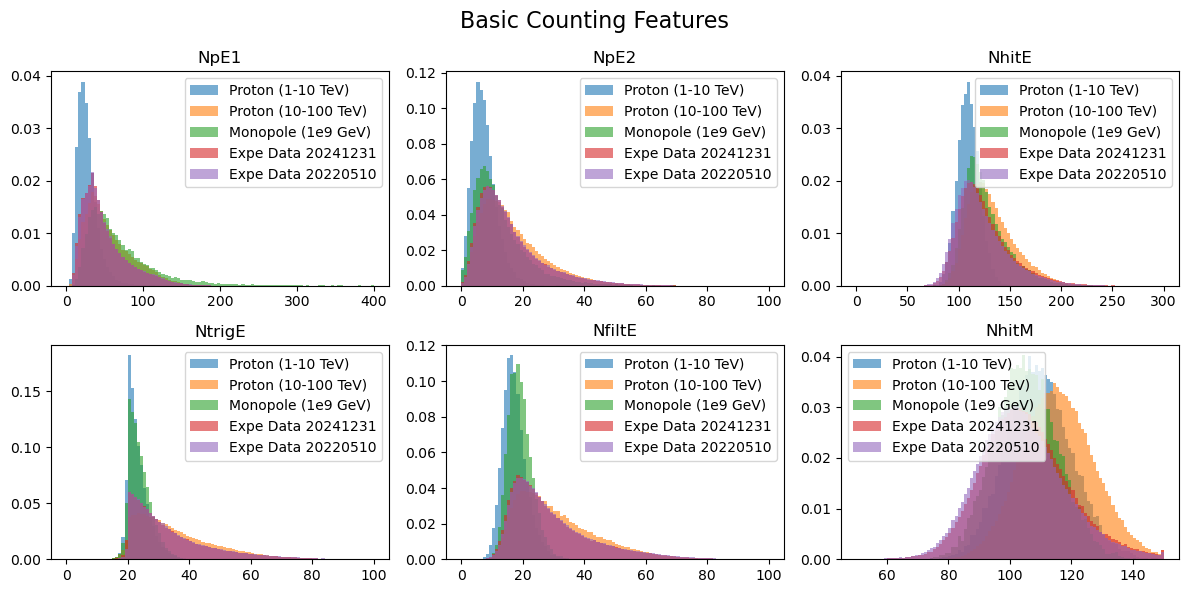

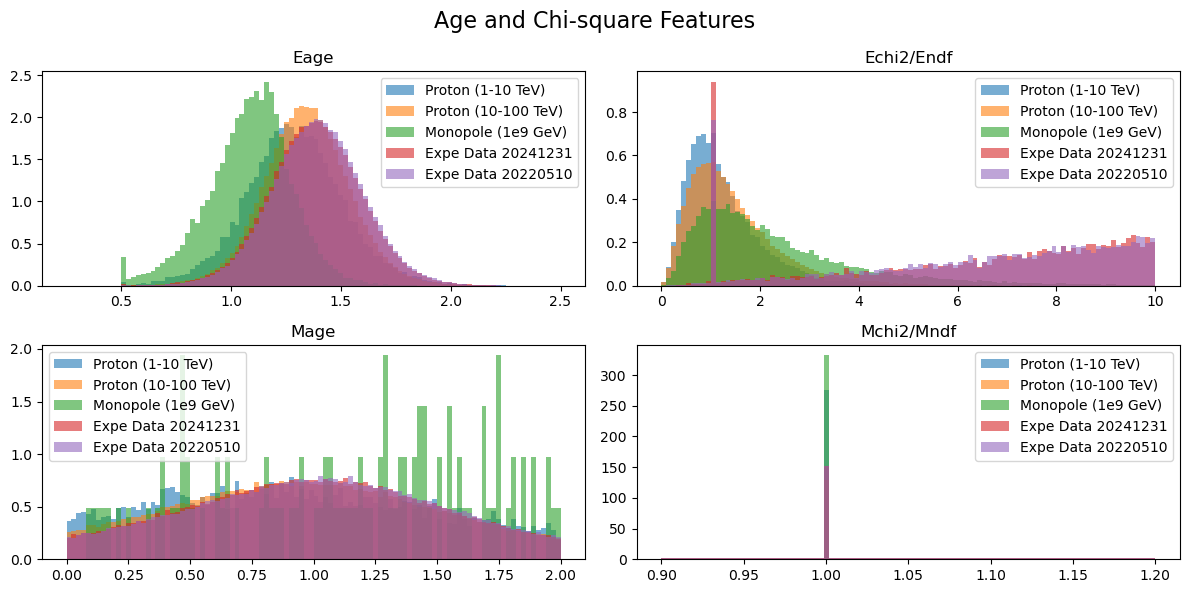

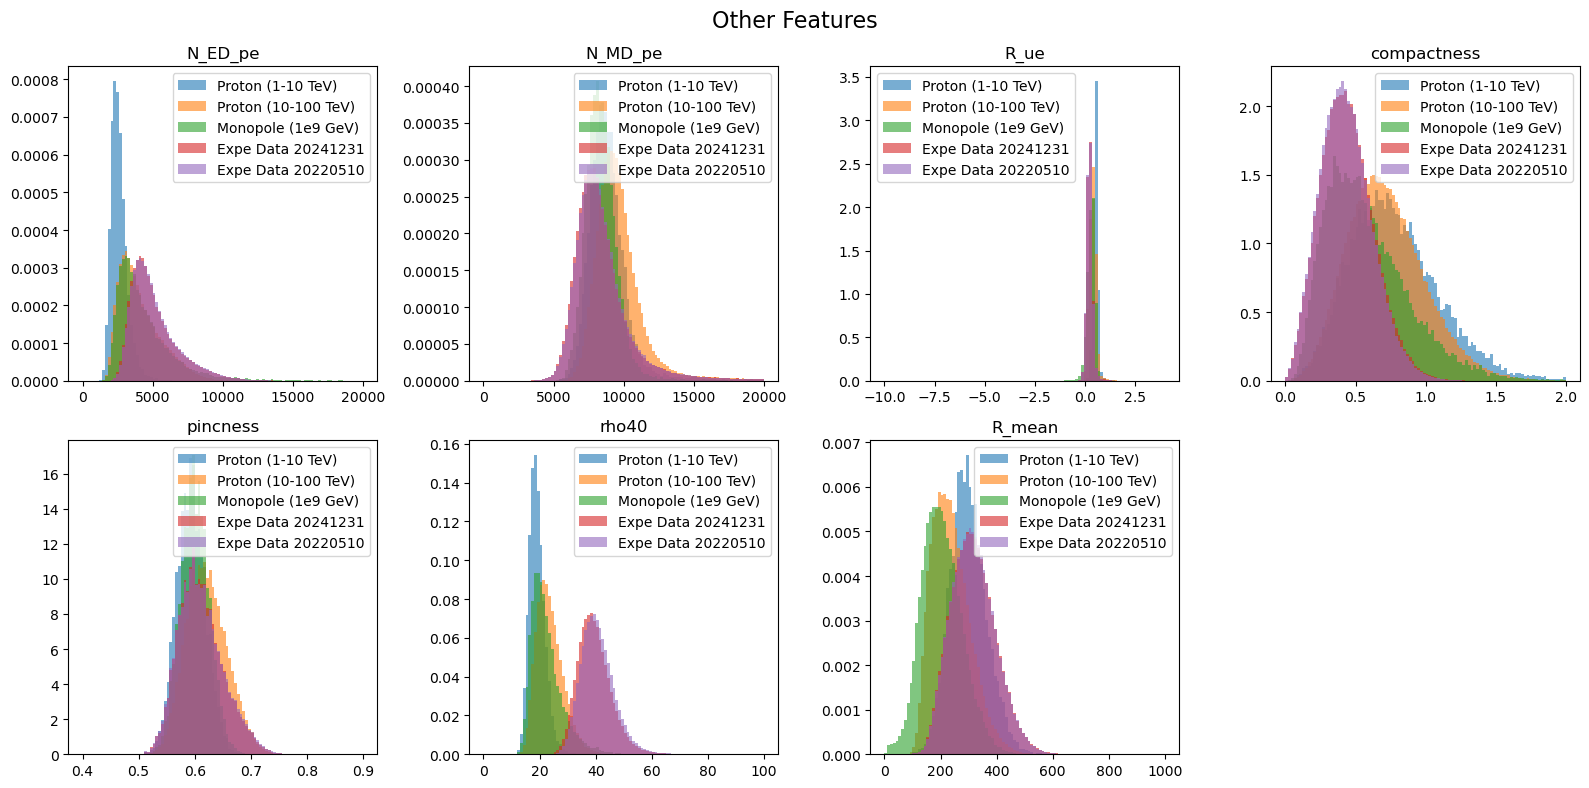

In [4]:

# 自定义参数
ranges_dict = {
            'NpE1': (0, 400),
            'NpE2': (0, 100),
            'NhitE': (0, 300),
            'NtrigE': (0, 100),
            'NfiltE': (0, 100),
            'NhitM': (50, 150),
            'Eage': (0.25, 2.5),
            'Echi2/Endf': (0, 10),
            'Mage': (0, 2),
            'Mchi2/Mndf': (0.9, 1.2),
            'N_ED_pe': (0, 2e4),
            'N_MD_pe': (0, 2e4),
            'R_ue': (-10, 4),
            'compactness': (0, 2),
            'pincness': (0.4, 0.9),
            'rho40': (0,100),
            'R_mean': (0,1000)
        }

custom_labels = {
    # 'gamma1': 'Gamma (1-10 TeV)',
    # 'gamma2': 'Gamma (10-100 TeV)',
    'proton1': 'Proton (1-10 TeV)',
    'proton2': 'Proton (10-100 TeV)',
    'mono': 'Monopole (1e9 GeV)',
    'exp': 'Expe Data 20241231',
    'exp2': 'Expe Data 20220510',
}

datasets=[
    # gamma_params1,
        #    gamma_params2,
           proton_params1,
           proton_params2,
             monopole_params1,
             exp_data_1,
             exp_data_2,
             ]

plot_histograms(
    datasets=datasets,
    labels=custom_labels.values(),
    ranges_dict=ranges_dict
)

[[ 0.03497632 -0.08921758 -1.25099035  0.32629137 -1.53936815 -0.68457022]
 [ 0.27350678 -0.06140859 -0.06385169  1.00855907 -0.93414106 -0.08160326]
 [ 0.68485038 -0.473268   -0.14917715  1.0442909  -0.4422973   0.13640637]
 ...
 [-0.29071149 -0.05859331 -0.78327048 -1.20821137 -0.45306311 -1.22678084]
 [ 0.49300639 -0.83096611  1.3927914   1.67462536 -0.35323469 -1.10860856]
 [-0.80071563 -0.6796343   0.83930403 -0.33742895 -0.19037733 -0.59795909]]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

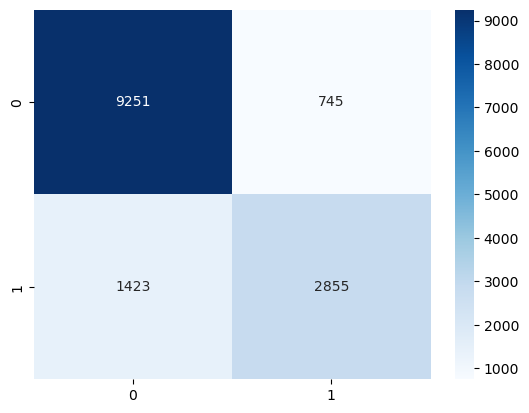

[0.6301676  0.95526737 0.9967744  ... 0.8349759  0.8014094  0.3011938 ]
[0.3156628  0.10581534 0.27908716 ... 0.08056006 0.05088433 0.00259939]


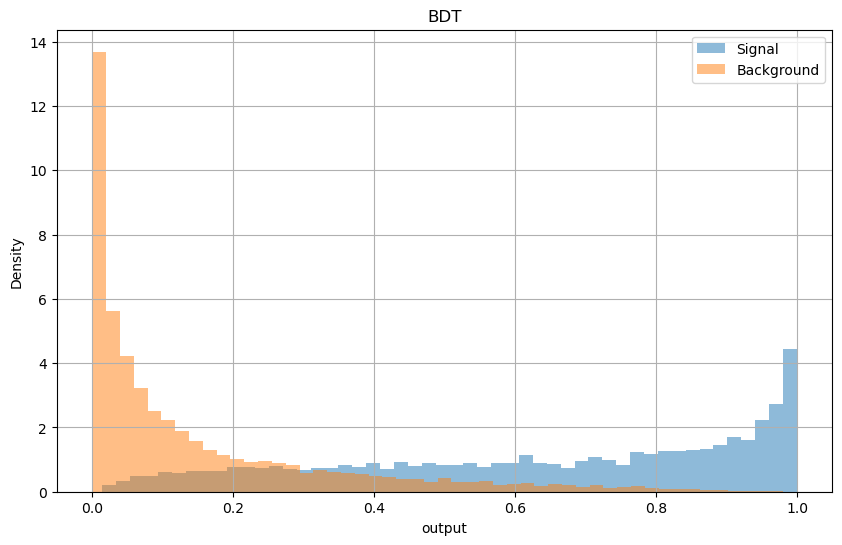

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Step 1: Load data (assume CSV file with columns: Eage, Echi2/ndf, compactness, R_mean, label)
# Replace 'your_data.csv' with your actual file path
data_ga = pd.read_csv('D:/km2a_monopole/Filt_Event/Dataset_Filted/Simulation/gamma/1e4_1e5/combined_paras_gamma_1e4_1e5.csv')
data_sig = pd.read_csv('D:/km2a_monopole/Filt_Event/Dataset_Filted/Simulation/monopole/E1e9/combined_paras_monopole_E1e9.csv')

num_bkg=50000
num_sig=len(data_sig)
data_bkg = data_ga.sample(n=num_bkg, random_state=42)

# Combine background and signal data
data = pd.concat([data_bkg, data_sig], ignore_index=True)
# Add label column: 0 for background, 1 for signal
data['Echi2/Endf']=data['Echi']/data['Endf']
features = ['Eage', 'Echi2/Endf', 'compactness', 'R_mean','pincness','rho40']  # Add more features if needed

X = data[features].values
y = [0] * len(data_bkg) + [1] * len(data_sig)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征（可选，BDT通常不需要，但某些情况下可能提升性能）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化 XGBoost 分类器
model = xgb.XGBClassifier(
    n_estimators=100,  # 树的数量
    max_depth=3,       # 树的最大深度
    learning_rate=0.1, # 学习率
    subsample=0.8,     # 每棵树使用的样本比例
    colsample_bytree=0.8,  # 每棵树使用的特征比例
    random_state=42,
    eval_metric="auc"  # 评估指标（AUC）
)


print(X_train_scaled)
print(y_train)
# 训练模型
model.fit(X_train_scaled, y_train)

# 预测测试集
y_pred = model.predict(X_test_scaled)           # 预测类别（0/1）
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # 预测正类概率（归一化）

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("混淆矩阵:\n", conf_matrix)

# 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()


# 分离信号和背景的预测概率
y_test=np.array(y_test)
signal_probs = y_proba[y_test == 1]
bkg_probs = y_proba[y_test == 0]
print(signal_probs)
print(bkg_probs)
# 绘制概率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(
    signal_probs,
    bins=50,
    alpha=0.5,
    label="Signal",
    density=True,  # 归一化
)
plt.hist(
    bkg_probs,
    bins=50,
    alpha=0.5,
    label="Background",
    density=True,
)
plt.xlabel("output")
plt.ylabel("Density")
plt.title("BDT")
plt.legend()
plt.grid(True)
plt.show()

# # 获取特征重要性
# importance = model.feature_importances_
# feature_importance = pd.DataFrame(
#     {"Feature": features, "Importance": importance}
# ).sort_values("Importance", ascending=False)

# # 绘制特征重要性
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Importance", y="Feature", data=feature_importance)
# plt.title("important features")
# plt.show()

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 1.0}
Accuracy: 0.8507776376628836
AUC: 0.9166944009955547
Confusion Matrix:
 [[9255  741]
 [1389 2889]]


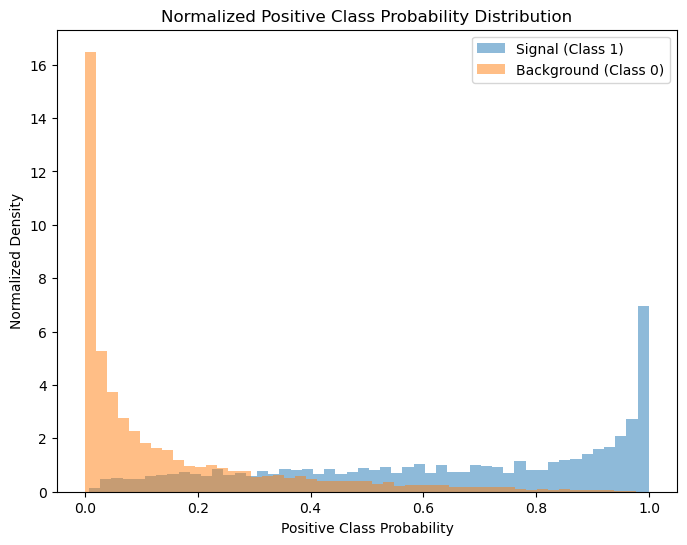

Plot saved to 'probability_distribution.png'


In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(42)
data_ga = pd.read_csv('D:/km2a_monopole/Filt_Event/Dataset_Filted/Simulation/gamma/1e4_1e5/combined_paras_gamma_1e4_1e5.csv')
data_sig = pd.read_csv('D:/km2a_monopole/Filt_Event/Dataset_Filted/Simulation/monopole/E1e9/combined_paras_monopole_E1e9.csv')

num_bkg=50000
num_sig=len(data_sig)
data_bkg = data_ga.sample(n=num_bkg, random_state=42)

# Combine background and signal data
data = pd.concat([data_bkg, data_sig], ignore_index=True)
# Add label column: 0 for background, 1 for signal
data['Echi2/Endf']=data['Echi']/data['Endf']
features = ['Eage', 'Echi2/Endf', 'compactness', 'R_mean','pincness','rho40']  # Add more features if needed

X = data[features].values
y = [0] * len(data_bkg) + [1] * len(data_sig)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Define BDT model using XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Parameter grid for tuning (based on typical values for classification tasks)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns
    'gamma': [0, 0.1],  # Minimum loss reduction
    'reg_lambda': [1, 10]  # L2 regularization
}

# Step 3: Grid search for best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 4: Predict on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Positive class probability (signal)

# Step 5: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("Confusion Matrix:\n", conf_matrix)

# Step 6: Plot normalized positive class probability distribution
y_test=np.array(y_test)
signal_prob = y_prob[y_test == 1]
background_prob = y_prob[y_test == 0]

plt.figure(figsize=(8, 6))
plt.hist(signal_prob, bins=50, density=True, alpha=0.5, label='Signal (Class 1)')
plt.hist(background_prob, bins=50, density=True, alpha=0.5, label='Background (Class 0)')
plt.xlabel('Positive Class Probability')
plt.ylabel('Normalized Density')
plt.legend()
plt.title('Normalized Positive Class Probability Distribution')
plt.show()  # Display the plot

print("Plot saved to 'probability_distribution.png'")

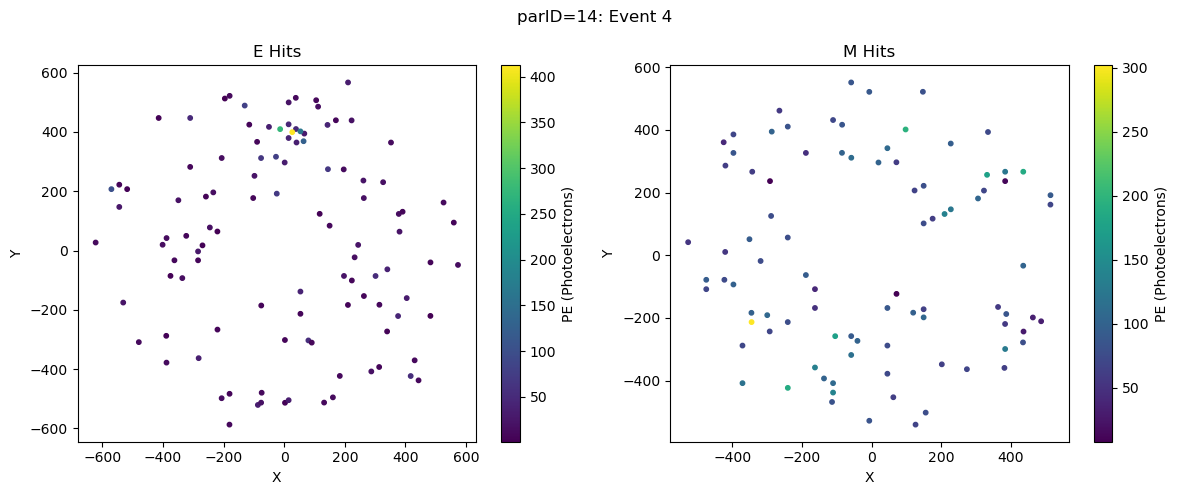

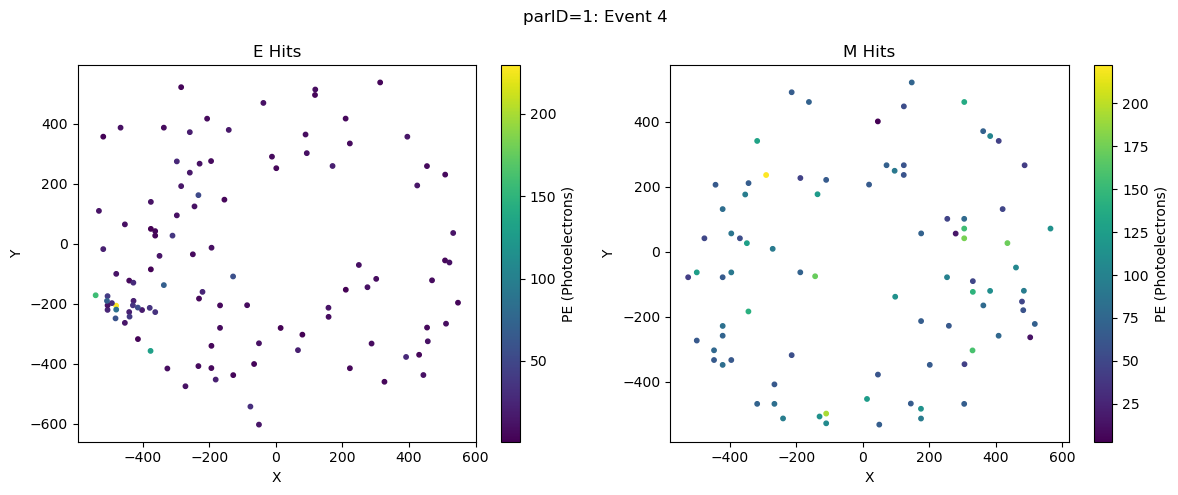

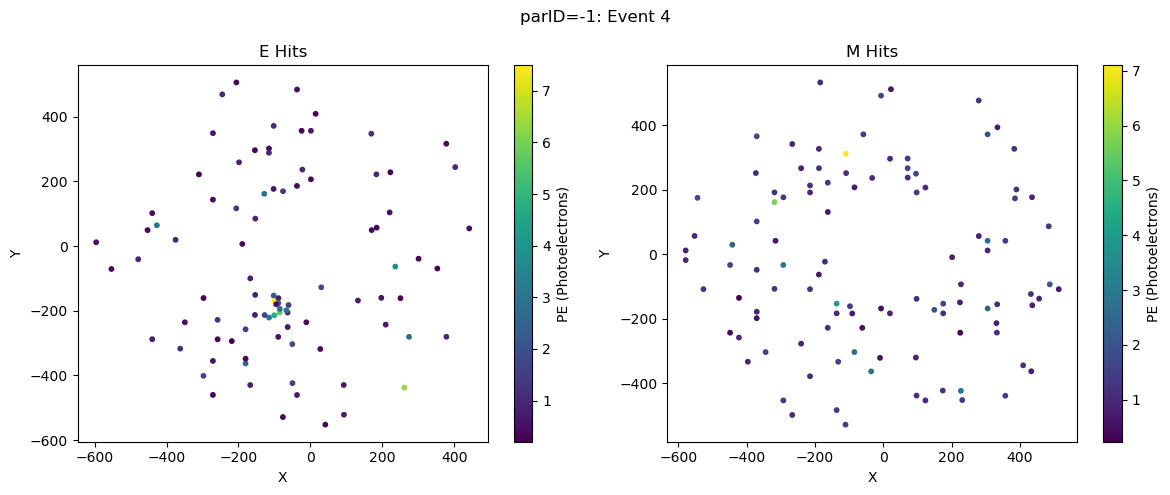

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_npz(n,file_path):
    data = np.load(file_path, allow_pickle=True)
    hitsE=data['hitsE'][n]
    hitsM=data['hitsM'][n]
    parID=data['labels'][n]
    # hitsE = pd.DataFrame(hitsE,columns=['x','y','pe'])
    # hitsM = pd.DataFrame(hitsM,columns=['x','y','pe'])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    scatter1 = ax1.scatter(hitsE[:,0], hitsE[:,1], c=hitsE[:,2], s=10)
    # ax1.scatter(core[0], core[1], c='r', s=100, marker='x')
    ax1.set_title('E Hits')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    fig.colorbar(scatter1, ax=ax1, label='PE (Photoelectrons)')

    scatter2 = ax2.scatter(hitsM[:,0], hitsM[:,1], c=hitsM[:,2], s=10)
    # ax2.scatter(core[0], core[1], c='r', s=100, marker='x')
    ax2.set_title('M Hits')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    fig.colorbar(scatter2, ax=ax2, label='PE (Photoelectrons)')
    # fig.title(f'parID={parID}: Event {n}')
    fig.suptitle(f'parID={parID}: Event {n}')
    plt.tight_layout()
    plt.show()
    plt.close()
file_path_pr='./Dataset_Filted/Simulation/proton/1e4_1e5/train_dataset_proton_1e4_1e5_run000.npz'
file_path_pr='./Dataset_Filted/Simulation/proton/1e3_1e4/train_dataset_proton_1e3_1e4_run000.npz'
n=4
plot_npz(n,file_path_pr)

file_path_ga='./Dataset_Filted/Simulation/gamma/1e4_1e5/train_dataset_gamma_1e4_1e5_run000.npz'
file_path_ga='./Dataset_Filted/Simulation/gamma/1e3_1e4/train_dataset_gamma_1e3_1e4_run000.npz'
plot_npz(n,file_path_ga)

file_path_exp='./Dataset_Filted/Experiment/2022/0510/train_dataset_Exp_20220510_1e9_V01.npz'
# n=2
plot_npz(n,file_path_exp)

In [ ]:
# 将CNN分类模型放在实验数据上
from CNN_test import CNN_exp_test

exp_npz_20220510='./Dataset_Filted/Experiment/2022/0510/combined_Exp_20220510_1e9_V01_dataset.npz'
exp_npz_20241231='./Dataset_Filted/Experiment/2024/1231/combined_Exp_20241231_1e9_V01_dataset.npz'

CNN_exp_test(exp_npz_20220510,'CNN2_ExpTest_20220510')
CNN_exp_test(exp_npz_20241231,'CNN2_ExpTest_20241231')



实验数据集加载完成, 开始使用CNN分类
 使用模型为: ./models/best_cnn_model_new_loss-coswarmre.pt


In [2]:
import torch
import numpy as np

# 检查GPU状态
print("=== GPU 状态检查 ===")
print(f"PyTorch版本: {torch.__version__}")
print(f"CUDA可用: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU数量: {torch.cuda.device_count()}")
    print(f"当前GPU: {torch.cuda.current_device()}")
    print(f"GPU名称: {torch.cuda.get_device_name(0)}")
    print(f"CUDA版本: {torch.version.cuda}")
else:
    print("CUDA不可用,可能的原因:")
    print("1. 没有安装NVIDIA驱动")
    print("2. 没有安装CUDA工具包")
    print("3. PyTorch没有安装GPU版本")
import torch
print(torch.__config__.show())
import torch
import torchvision
import torchaudio

print(f"PyTorch版本: {torch.__version__}")
print(f"TorchVision版本: {torchvision.__version__}")
print(f"TorchAudio版本: {torchaudio.__version__}")
print(f"CUDA可用: {torch.cuda.is_available()}")

=== GPU 状态检查 ===
PyTorch版本: 2.3.0
CUDA可用: True
GPU数量: 4
当前GPU: 0
GPU名称: NVIDIA A10
CUDA版本: 11.8
PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86;-gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_90,code=sm_90;-gencode;arch=compute_37,code=compute_37
  - CuDNN 8.7
  - Magma 2.6.1
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_V